In [35]:
import sys
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [36]:
# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 1
m1, m2 = 1, 1
# The gravitational acceleration (m.s-2).
g = 9.81

In [37]:
def deriv(y, t, L1, L2, m1, m2):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    theta1, z1, theta2, z2 = y

    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1dot = z1
    z1dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    theta2dot = z2
    z2dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    return theta1dot, z1dot, theta2dot, z2dot

In [38]:
def calc_E(y):
    """Return the total energy of the system."""

    th1, th1d, th2, th2d = y.T
    V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
    T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
            2*L1*L2*th1d*th2d*np.cos(th1-th2))
    return T + V

In [39]:
# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 30, 0.01
t = np.arange(0, tmax+dt, dt)

In [40]:
# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])

In [41]:
# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

In [42]:
# Check that the calculation conserves total energy to within some tolerance.
EDRIFT = 0.05

In [44]:
# Total energy from the initial conditions
E = calc_E(y0)
print(E)
# if np.max(np.sum(np.abs(calc_E(y) - E))) > EDRIFT:
#     sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

2.5708567992171414


In [45]:
# Unpack z and theta as a function of time
theta1, theta2 = y[:,0], y[:,2]

In [46]:
# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

In [47]:
# Plotted bob circle radius
r = 0.05
# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 1
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)

In [48]:
def make_plot(i):
    # Plot and save an image of the double pendulum configuration for time
    # point i.
    # The pendulum rods.
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
    # Circles representing the anchor point of rod 1, and bobs 1 and 2.
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
    c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-L1-L2-r, L1+L2+r)
    ax.set_ylim(-L1-L2-r, L1+L2+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig('frames/_img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()


0 / 300


FileNotFoundError: [Errno 2] No such file or directory: 'frames/_img0000.png'

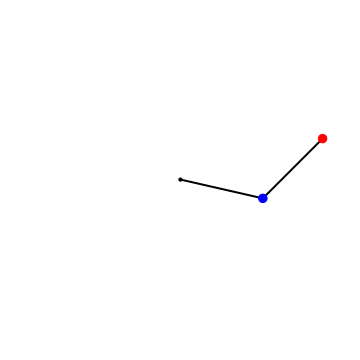

In [49]:
# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di)
    make_plot(i)